In [1]:
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install pillow
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 10.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
#from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import ImageFont
import visualkeras
from collections import defaultdict
from keras.utils import plot_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

train_path="/content/drive/MyDrive/Colab Notebooks/COVID-19_Pneumonia/train"    #Train folder path
validation_path="/content/drive/MyDrive/Colab Notebooks/COVID-19_Pneumonia/val"   #Validation folder path
test_path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Pneumonia/test"        #Test folder path


train_augmentation = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
validation_augmentation = ImageDataGenerator(rescale=1./255)
test_augmentation = ImageDataGenerator(rescale=1./255)

train_generator = train_augmentation.flow_from_directory(train_path,target_size=(224, 224),batch_size=32)
validation_generator = validation_augmentation.flow_from_directory(validation_path,target_size=(224, 224),batch_size=32)
test_generator = test_augmentation.flow_from_directory(test_path,target_size=(224, 224),batch_size=32)

base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Found 7577 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Found 270 images belonging to 2 classes.
19993432/19993432 [==============================] - 2s 0us/step


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
arc = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [6]:
arc.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [7]:
eff = arc.fit(train_generator,steps_per_epoch=len(train_generator),epochs=50,validation_data=validation_generator,validation_steps=len(validation_generator))


Epoch 1/50
237/237 [==============================] - 3340s 14s/step - loss: 0.0756 - accuracy: 0.9735 - precision: 0.9727 - recall: 0.9716 - val_loss: 0.0946 - val_accuracy: 0.9728 - val_precision: 0.9728 - val_recall: 0.9728
Epoch 2/50
237/237 [==============================] - 145s 612ms/step - loss: 0.0390 - accuracy: 0.9885 - precision: 0.9886 - recall: 0.9885 - val_loss: 0.0935 - val_accuracy: 0.9703 - val_precision: 0.9703 - val_recall: 0.9703
Epoch 3/50
237/237 [==============================] - 146s 618ms/step - loss: 0.0401 - accuracy: 0.9868 - precision: 0.9872 - recall: 0.9869 - val_loss: 0.0715 - val_accuracy: 0.9777 - val_precision: 0.9777 - val_recall: 0.9777
Epoch 4/50
237/237 [==============================] - 145s 614ms/step - loss: 0.0309 - accuracy: 0.9886 - precision: 0.9888 - recall: 0.9886 - val_loss: 0.0565 - val_accuracy: 0.9802 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 5/50
237/237 [==============================] - 143s 603ms/step - loss: 0.0367 - ac

In [8]:
arc.save('NASNetMobile_modelV2.h5')

In [9]:
eva = arc.evaluate(test_generator)
print(eva)

9/9 [==============================] - 200s 25s/step - loss: 0.1422 - accuracy: 0.9593 - precision: 0.9664 - recall: 0.9593
[0.14224283397197723, 0.9592592716217041, 0.9664179086685181, 0.9592592716217041]


In [10]:
loss = eva[0]
accuracy = eva[1]
precision = eva[2]
recall = eva[3]
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Calculations are shown here\n")
print("Loss:",loss)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1_score)

Calculations are shown here

Loss: 0.14224283397197723
Accuracy: 0.9592592716217041
Precision: 0.9664179086685181
Recall: 0.9592592716217041
F1 score: 0.9628252841546542


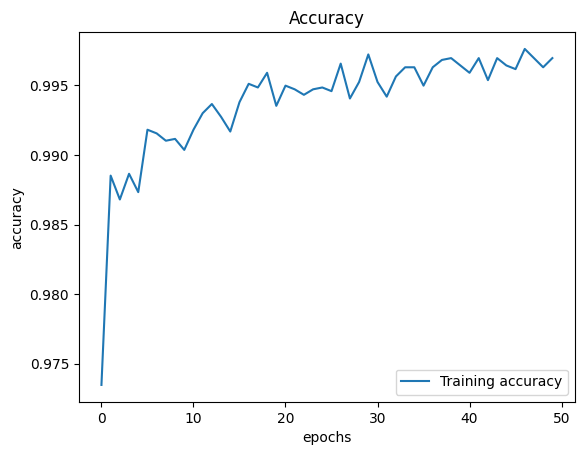

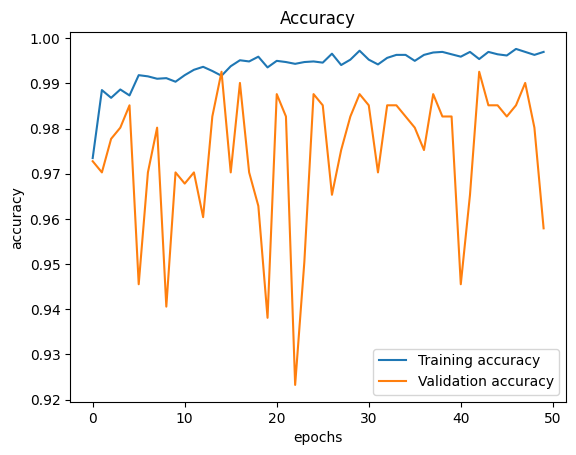

In [11]:
#Accuracy plot
plt.plot(eff.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training accuracy'], loc = 'lower right')
plt.show()

plt.plot(eff.history['accuracy'])
plt.plot(eff.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training accuracy','Validation accuracy'], loc = 'lower right')
plt.show()

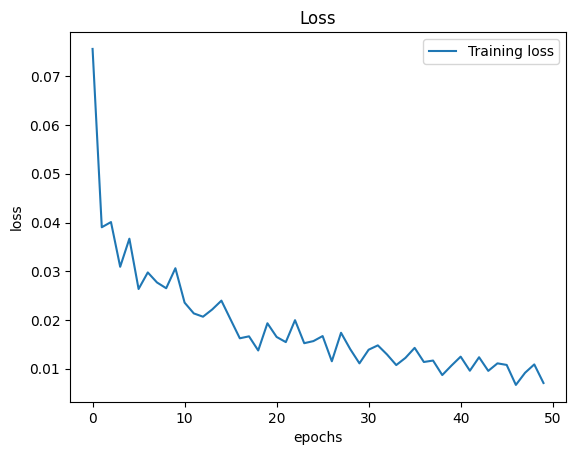

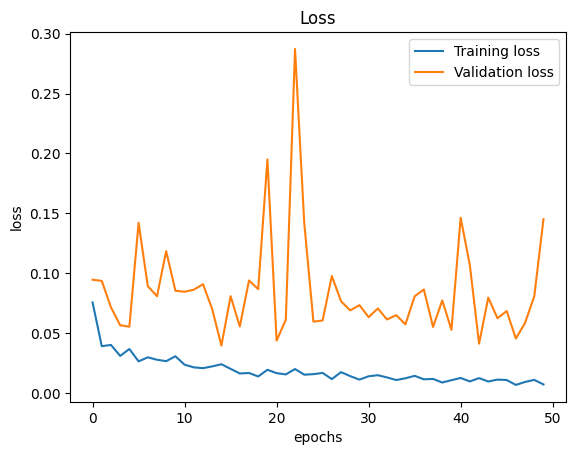

In [12]:
#Loss plot
plt.plot(eff.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training loss'], loc = 'upper right')
plt.show()

plt.plot(eff.history['loss'])
plt.plot(eff.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training loss','Validation loss'], loc = 'upper right')
plt.show()

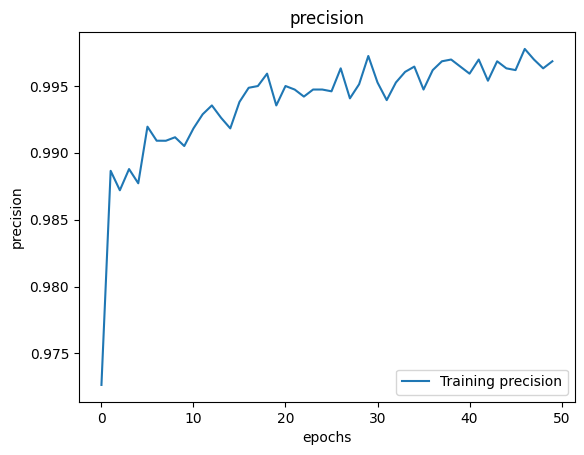

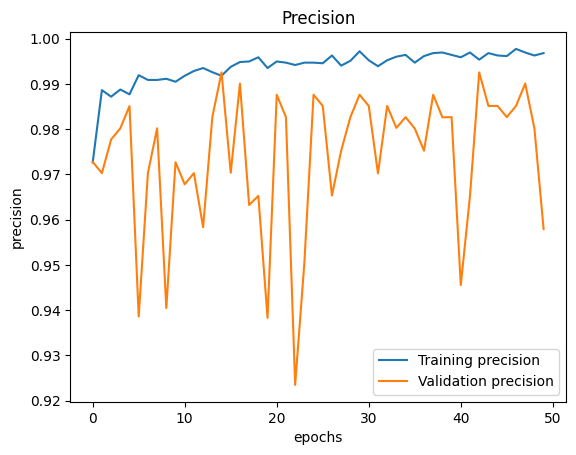

In [13]:
#Precision plot
plt.plot(eff.history['precision'])
plt.title('precision')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.legend(['Training precision'], loc = 'lower right')
plt.show()


plt.plot(eff.history['precision'])
plt.plot(eff.history['val_precision'])
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.legend(['Training precision','Validation precision'], loc = 'lower right')
plt.show()



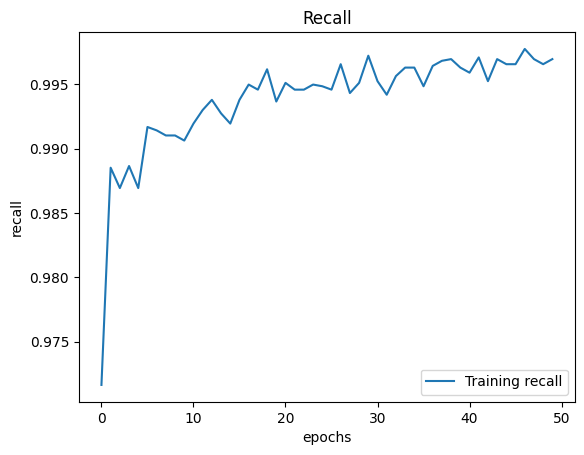

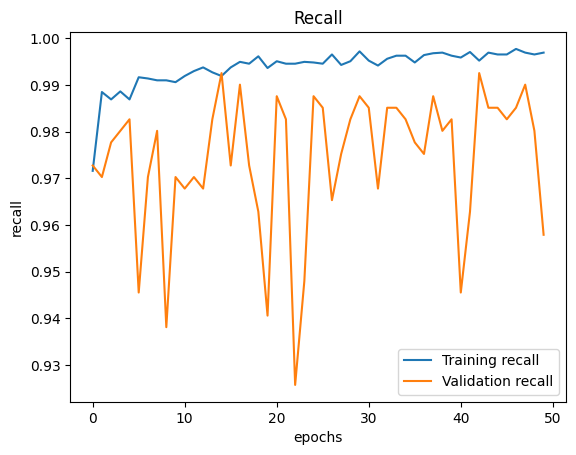

In [14]:
#Recall plot
plt.plot(eff.history['recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epochs')
plt.legend(['Training recall'], loc = 'lower right')
plt.show()

plt.plot(eff.history['recall'])
plt.plot(eff.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epochs')
plt.legend(['Training recall','Validation recall'], loc = 'lower right')
plt.show()

In [ ]:
#arc.save('CheXNet.h5')

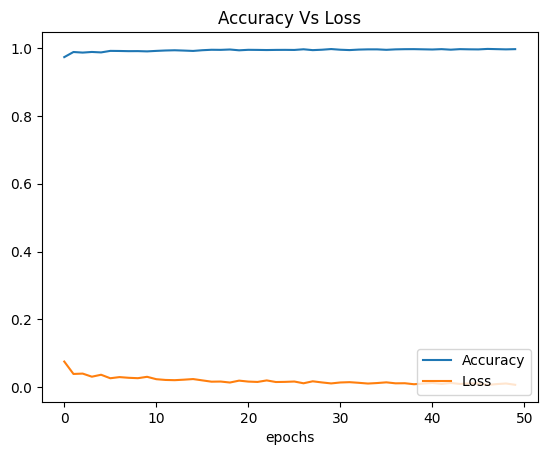

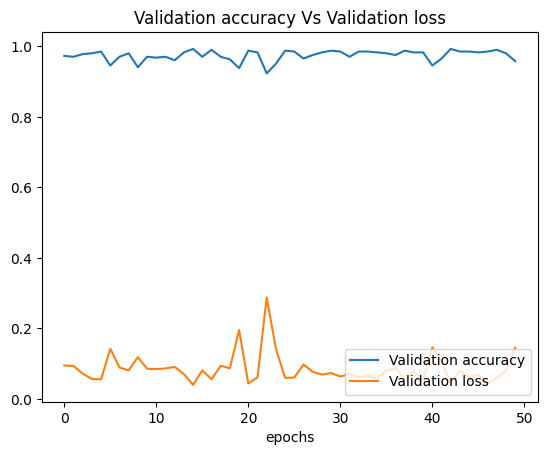

In [15]:
#Accuracy vs Loss plot
plt.plot(eff.history['accuracy'])
plt.plot(eff.history['loss'])
plt.title('Accuracy Vs Loss')
#plt.ylabel('accuracy vs loss')
plt.xlabel('epochs')
plt.legend(['Accuracy','Loss'], loc = 'lower right')
plt.show()

#Validation Accuracy vs Validation Loss plot
plt.plot(eff.history['val_accuracy'])
plt.plot(eff.history['val_loss'])
plt.title('Validation accuracy Vs Validation loss')
plt.xlabel('epochs')
plt.legend(['Validation accuracy','Validation loss'], loc = 'lower right')
plt.show()

In [16]:
!pip install scikit-learn
!pip install numpy
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


9/9 [==============================] - 22s 2s/step


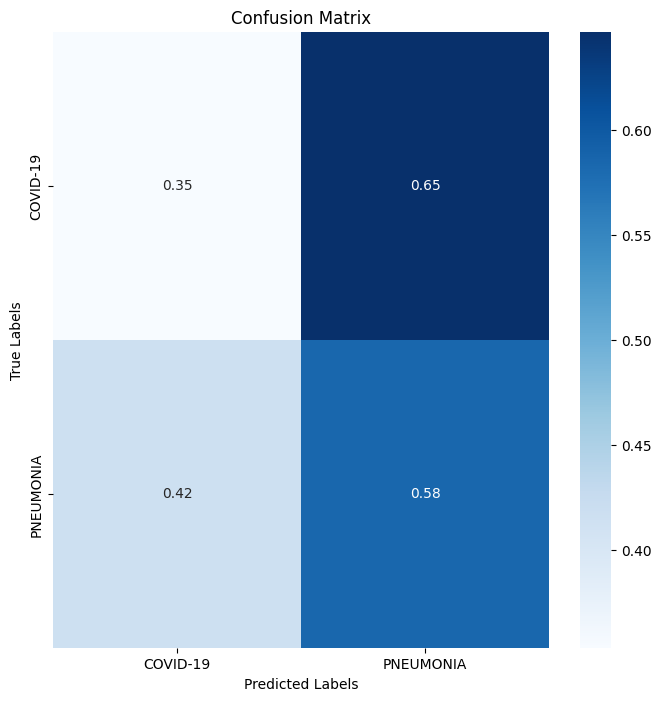

In [17]:
!pip install seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_pred = arc.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


cm = confusion_matrix(y_true, y_pred)

class_names = list(test_generator.class_indices.keys())

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
